In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist 


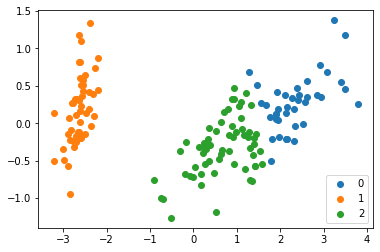

[1.9095626883214907, 0.7843727059296364, 0.5573542515215595, 0.45812662849947744]


In [ ]:
#Load Data
data = load_iris().data
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
#Applying our function
label = kmeans(df,3,300)
#Visualize the results
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()
distortions=[]
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    for epochs in range(no_of_iterations):
      centroids = []
      for idx in range(k):
        #Updating Centroids by taking mean of Cluster it belongs to
        temp_cent = x[points==idx].mean(axis=0) 
        centroids.append(temp_cent)
      centroids = np.vstack(centroids) #Updated Centroids      
      distances = cdist(x, centroids ,'euclidean')
      points = np.array([np.argmin(i) for i in distances])
    distortions.append(sum(np.min(cdist(x,centroids,'euclidean'), axis=1))/x.shape[0])
    return points 

for K in range(1,5):
  label = kmeans(df,K,300)
print (distortions)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
label=kmeans.labels_
print(metrics.mean_squared_error(label,load_iris().target))

0.5533333333333333
